# Figure 7: Classifying and comparing RGC responses of P30, P45, P90 between *wild-type* and *rd10* retinae

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap, Normalize

# ------------------------------------------------------------------------------------------------------------

# load and clean dataset

In [2]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE'
file_path = "/gpfs01/euler/User/dgonschorek/djimaging/djimaging/user/rd10/notebook_figures/rebuttal/data/rd10_data_20240304.pkl"
rd10_df = pd.read_pickle(file_path)  
# multiindex df to single index df
rd10_df = rd10_df.reset_index(level=[0,1,2,3,4,5,6,7,8,9,10,11])
# drop unnecessary keys
rd10_df = rd10_df.drop(columns=['training_data_hash','classifier_params_hash','preprocess_id','condition','raw_id','gchirp','bar'])
missing_genline_idx = np.where(rd10_df['genline']=='')[0]
rd10_df['genline'][missing_genline_idx]='rd10'
idx_p60 = np.where(rd10_df['animrem'].values=='P60')[0]
rd10_df = rd10_df.drop(idx_p60)
rd10_df = rd10_df.reset_index(drop=True)

/tmp/ipykernel_7266/2955959202.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd10_df['genline'][missing_genline_idx]='rd10'


In [3]:
# exclude classified cells below threshold
confidence_score = 0.25
rd10_df = rd10_df[rd10_df['max_confidence']>=confidence_score]

# -------------------------------------------------------------------------------------------------------

# Dataset preparation
## split by mouse line and add metrics

In [4]:
n_clusters = rd10_df['celltype'].max()

mean_cluster_chirp_wt = np.zeros((n_clusters,249))
mean_cluster_bar_wt = np.zeros((n_clusters,32))
std_cluster_chirp_wt = np.zeros((n_clusters,249))
std_cluster_bar_wt = np.zeros((n_clusters,32))

mean_cluster_chirp_rd = np.zeros((n_clusters,249))
mean_cluster_bar_rd = np.zeros((n_clusters,32))
std_cluster_chirp_rd = np.zeros((n_clusters,249))
std_cluster_bar_rd = np.zeros((n_clusters,32))

n_cells_per_line = np.zeros((n_clusters,2))

mean_cluster_bar_wt = np.roll(mean_cluster_bar_wt,-5,axis=1)
std_cluster_bar_wt = np.roll(std_cluster_bar_wt,-5,axis=1)

mean_cluster_bar_rd = np.roll(mean_cluster_bar_rd,-5,axis=1)
std_cluster_bar_rd = np.roll(std_cluster_bar_rd,-5,axis=1)

# Compute mean trace for WT and rd10 for each age

In [5]:
chirp_wt_p30_mean = np.zeros((46,249))
bar_wt_p30_mean = np.zeros((46,32))
chirp_wt_p45_mean = np.zeros((46,249))
bar_wt_p45_mean = np.zeros((46,32))
chirp_wt_p90_mean = np.zeros((46,249))
bar_wt_p90_mean = np.zeros((46,32))

chirp_rd_p30_mean = np.zeros((46,249))
bar_rd_p30_mean = np.zeros((46,32))
chirp_rd_p45_mean = np.zeros((46,249))
bar_rd_p45_mean = np.zeros((46,32))
chirp_rd_p90_mean = np.zeros((46,249))
bar_rd_p90_mean = np.zeros((46,32))

for j in range(1,47):

    chirp_wt_p30 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values
    bar_wt_p30 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_bar'].values
    chirp_wt_p45 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values
    bar_wt_p45 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_bar'].values
    chirp_wt_p90 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values
    bar_wt_p90 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_bar'].values
    
    chirp_rd_p30 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values
    bar_rd_p30 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_bar'].values
    chirp_rd_p45 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values
    bar_rd_p45 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_bar'].values
    chirp_rd_p90 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values
    bar_rd_p90 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_bar'].values
    
    # P30 - WT
    if chirp_wt_p30.shape[0] == 0:
        chirp_wt_p30 = 0#np.zeros(249)
        bar_wt_p30 = 0#np.zeros(32)
    elif chirp_wt_p30.shape[0] == 1:
        chirp_wt_p30 = chirp_wt_p30[0]
        bar_wt_p30 = bar_wt_p30[0]
    else: 
        chirp_wt_p30 = np.mean(chirp_wt_p30,axis=0)
        bar_wt_p30 = np.mean(bar_wt_p30,axis=0)
        
    # P30 - rd10
    if chirp_rd_p30.shape[0] == 0:
        chirp_rd_p30 = 0#np.zeros(249)
        bar_rd_p30 = 0#np.zeros(32)   
    elif chirp_rd_p30.shape[0] == 1:
        chirp_rd_p30 = chirp_rd_p30[0]
        bar_rd_p30 = bar_rd_p30[0]   
    else: 
        chirp_rd_p30 = np.mean(chirp_rd_p30,axis=0)
        bar_rd_p30 = np.mean(bar_rd_p30,axis=0)
        
    # P45 - WT
    if chirp_wt_p45.shape[0] == 0:
        chirp_wt_p45 = 0#np.zeros(249)
        bar_wt_p45 = 0#np.zeros(32)  
    elif chirp_wt_p45.shape[0] == 1:
        chirp_wt_p45 = chirp_wt_p45[0]
        bar_wt_p45 = bar_wt_p45[0]   
    else: 
        chirp_wt_p45 = np.mean(chirp_wt_p45,axis=0)
        bar_wt_p45 = np.mean(bar_wt_p45,axis=0)
        
    # P45 - rd10
    if chirp_rd_p45.shape[0] == 0:
        chirp_rd_p45 = 0#np.zeros(249)
        bar_rd_p45 = 0#np.zeros(32)   
    elif chirp_rd_p45.shape[0] == 1:
        chirp_rd_p45 = chirp_rd_p45[0]
        bar_rd_p45 = bar_rd_p45[0] 
    else: 
        chirp_rd_p45 = np.mean(chirp_rd_p45,axis=0)
        bar_rd_p45 = np.mean(bar_rd_p45,axis=0)
        
    # P90 - WT
    if chirp_wt_p90.shape[0] == 0:
        chirp_wt_p90 = 0#np.zeros(249)
        bar_wt_p90 = 0#np.zeros(32) 
    elif chirp_wt_p90.shape[0] == 1:
        chirp_wt_p90 = chirp_wt_p90[0]
        bar_wt_p90 = bar_wt_p90[0]
    else: 
        chirp_wt_p90 = np.mean(chirp_wt_p90,axis=0)
        bar_wt_p90 = np.mean(bar_wt_p90,axis=0)
       
    # P90 - rd10
    if chirp_rd_p90.shape[0] == 0:
        chirp_rd_p90 = 0#np.zeros(249)
        bar_rd_p90 = 0#np.zeros(32)
    elif chirp_rd_p90.shape[0] == 1:
        chirp_rd_p90 = chirp_rd_p90[0]
        bar_rd_p90 = bar_rd_p90[0]
    else: 
        chirp_rd_p90 = np.mean(chirp_rd_p90,axis=0)
        bar_rd_p90 = np.mean(bar_rd_p90,axis=0)
    
    chirp_wt_p30_mean[j-1] = chirp_wt_p30
    chirp_wt_p45_mean[j-1] = chirp_wt_p45
    chirp_wt_p90_mean[j-1] = chirp_wt_p90
    chirp_rd_p30_mean[j-1] = chirp_rd_p30
    chirp_rd_p45_mean[j-1] = chirp_rd_p45
    chirp_rd_p90_mean[j-1] = chirp_rd_p90
    
    bar_wt_p30_mean[j-1] = bar_wt_p30
    bar_wt_p45_mean[j-1] = bar_wt_p45
    bar_wt_p90_mean[j-1] = bar_wt_p90
    bar_rd_p30_mean[j-1] = bar_rd_p30
    bar_rd_p45_mean[j-1] = bar_rd_p45
    bar_rd_p90_mean[j-1] = bar_rd_p90

In [6]:
chirp_wt_p30_std = np.zeros((46,249))
bar_wt_p30_std = np.zeros((46,32))
chirp_wt_p45_std = np.zeros((46,249))
bar_wt_p45_std = np.zeros((46,32))
chirp_wt_p90_std = np.zeros((46,249))
bar_wt_p90_std = np.zeros((46,32))

chirp_rd_p30_std = np.zeros((46,249))
bar_rd_p30_std = np.zeros((46,32))
chirp_rd_p45_std = np.zeros((46,249))
bar_rd_p45_std = np.zeros((46,32))
chirp_rd_p90_std = np.zeros((46,249))
bar_rd_p90_std = np.zeros((46,32))

for j in range(1,47):

    chirp_wt_p30 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values
    bar_wt_p30 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_bar'].values
    chirp_wt_p45 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values
    bar_wt_p45 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_bar'].values
    chirp_wt_p90 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values
    bar_wt_p90 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_bar'].values
    
    chirp_rd_p30 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values
    bar_rd_p30 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_bar'].values
    chirp_rd_p45 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values
    bar_rd_p45 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_bar'].values
    chirp_rd_p90 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values
    bar_rd_p90 = rd10_df[(rd10_df['celltype']==j)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_bar'].values
    
    # P30 - WT
    if chirp_wt_p30.shape[0] == 0:
        chirp_wt_p30 = 0#np.zeros(249)
        bar_wt_p30 = 0#np.zeros(32)
    elif chirp_wt_p30.shape[0] == 1:
        chirp_wt_p30 = chirp_wt_p30[0]
        bar_wt_p30 = bar_wt_p30[0]
    else: 
        chirp_wt_p30 = np.std(chirp_wt_p30,axis=0)
        bar_wt_p30 = np.std(bar_wt_p30,axis=0)
        
    # P30 - rd10
    if chirp_rd_p30.shape[0] == 0:
        chirp_rd_p30 = 0#np.zeros(249)
        bar_rd_p30 = 0#np.zeros(32)   
    elif chirp_rd_p30.shape[0] == 1:
        chirp_rd_p30 = chirp_rd_p30[0]
        bar_rd_p30 = bar_rd_p30[0]   
    else: 
        chirp_rd_p30 = np.std(chirp_rd_p30,axis=0)
        bar_rd_p30 = np.std(bar_rd_p30,axis=0)
        
    # P45 - WT
    if chirp_wt_p45.shape[0] == 0:
        chirp_wt_p45 = 0#np.zeros(249)
        bar_wt_p45 = 0#np.zeros(32)  
    elif chirp_wt_p45.shape[0] == 1:
        chirp_wt_p45 = chirp_wt_p45[0]
        bar_wt_p45 = bar_wt_p45[0]   
    else: 
        chirp_wt_p45 = np.std(chirp_wt_p45,axis=0)
        bar_wt_p45 = np.std(bar_wt_p45,axis=0)
        
    # P45 - rd10
    if chirp_rd_p45.shape[0] == 0:
        chirp_rd_p45 = 0#np.zeros(249)
        bar_rd_p45 = 0#np.zeros(32)   
    elif chirp_rd_p45.shape[0] == 1:
        chirp_rd_p45 = chirp_rd_p45[0]
        bar_rd_p45 = bar_rd_p45[0] 
    else: 
        chirp_rd_p45 = np.std(chirp_rd_p45,axis=0)
        bar_rd_p45 = np.std(bar_rd_p45,axis=0)
        
    # P90 - WT
    if chirp_wt_p90.shape[0] == 0:
        chirp_wt_p90 = 0#np.zeros(249)
        bar_wt_p90 = 0#np.zeros(32) 
    elif chirp_wt_p90.shape[0] == 1:
        chirp_wt_p90 = chirp_wt_p90[0]
        bar_wt_p90 = bar_wt_p90[0]
    else: 
        chirp_wt_p90 = np.std(chirp_wt_p90,axis=0)
        bar_wt_p90 = np.std(bar_wt_p90,axis=0)
       
    # P90 - rd10
    if chirp_rd_p90.shape[0] == 0:
        chirp_rd_p90 = 0#np.zeros(249)
        bar_rd_p90 = 0#np.zeros(32)
    elif chirp_rd_p90.shape[0] == 1:
        chirp_rd_p90 = chirp_rd_p90[0]
        bar_rd_p90 = bar_rd_p90[0]
    else: 
        chirp_rd_p90 = np.std(chirp_rd_p90,axis=0)
        bar_rd_p90 = np.std(bar_rd_p90,axis=0)
    
    chirp_wt_p30_std[j-1] = chirp_wt_p30
    chirp_wt_p45_std[j-1] = chirp_wt_p45
    chirp_wt_p90_std[j-1] = chirp_wt_p90
    chirp_rd_p30_std[j-1] = chirp_rd_p30
    chirp_rd_p45_std[j-1] = chirp_rd_p45
    chirp_rd_p90_std[j-1] = chirp_rd_p90
    
    bar_wt_p30_std[j-1] = bar_wt_p30
    bar_wt_p45_std[j-1] = bar_wt_p45
    bar_wt_p90_std[j-1] = bar_wt_p90
    bar_rd_p30_std[j-1] = bar_rd_p30
    bar_rd_p45_std[j-1] = bar_rd_p45
    bar_rd_p90_std[j-1] = bar_rd_p90

# Compute Inter-cluster correlation

In [7]:
chirp_corr_p30 = np.zeros((32,32))
chirp_corr_p45 = np.zeros((32,32))
chirp_corr_p90 = np.zeros((32,32))

bar_corr_p30 = np.zeros((32,32))
bar_corr_p45 = np.zeros((32,32))
bar_corr_p90 = np.zeros((32,32))

for i in range(32):
    for j in range(32):
        chirp_corr_p30[i,j] = np.corrcoef(chirp_wt_p30_mean[i,:],chirp_rd_p30_mean[j,:])[0,1]
        chirp_corr_p45[i,j] = np.corrcoef(chirp_wt_p45_mean[i,:],chirp_rd_p45_mean[j,:])[0,1]
        chirp_corr_p90[i,j] = np.corrcoef(chirp_wt_p90_mean[i,:],chirp_rd_p90_mean[j,:])[0,1]
        
        bar_corr_p30[i,j] = np.corrcoef(bar_wt_p30_mean[i,:],bar_rd_p30_mean[j,:])[0,1]
        bar_corr_p45[i,j] = np.corrcoef(bar_wt_p45_mean[i,:],bar_rd_p45_mean[j,:])[0,1]
        bar_corr_p90[i,j] = np.corrcoef(bar_wt_p90_mean[i,:],bar_rd_p90_mean[j,:])[0,1] 

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [8]:
chirp_corr_p30 = np.nan_to_num(chirp_corr_p30, nan=0)
chirp_corr_p45 = np.nan_to_num(chirp_corr_p45, nan=0)
chirp_corr_p90 = np.nan_to_num(chirp_corr_p90, nan=0)

bar_corr_p30 = np.nan_to_num(bar_corr_p30, nan=0)
bar_corr_p45 = np.nan_to_num(bar_corr_p45, nan=0)
bar_corr_p90 = np.nan_to_num(bar_corr_p90, nan=0)

In [9]:
def heatmap_mask_zero_white(data):
    
    mask_rows = np.all(np.isnan(data) | (data == 0), axis=1)
    mask_cols = np.all(np.isnan(data) | (data == 0), axis=0)

    # Combine the row and column masks to apply to the entire data matrix
    mask = np.outer(mask_rows, np.ones(data.shape[1], dtype=bool)) | np.outer(np.ones(data.shape[0], dtype=bool), mask_cols)

    # Mask the data: Set masked rows and columns to NaN so they are handled by the colormap
    data_masked = np.ma.masked_where(mask, data)
    cmap = plt.cm.coolwarm
    coolwarm_colors = cmap(np.linspace(0, 1, cmap.N))
    coolwarm_with_white = np.vstack(([0,0,0,0], coolwarm_colors))
    custom_cmap = ListedColormap(coolwarm_with_white)
    
    return data_masked

# Plot correlation matrices

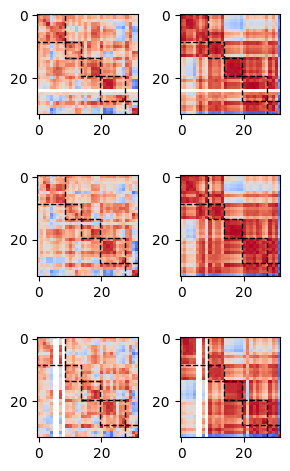

In [10]:
cmap = plt.cm.coolwarm
coolwarm_colors = cmap(np.linspace(0, 1, cmap.N))
coolwarm_with_white = np.vstack(([0,0,0,0], coolwarm_colors))
custom_cmap = ListedColormap(coolwarm_with_white)


fig,ax=plt.subplots(3,2,figsize=(3,5))


data_masked_chirp_corr_p30 = heatmap_mask_zero_white(chirp_corr_p30)
ax[0,0].imshow(data_masked_chirp_corr_p30,cmap=custom_cmap,vmin=-1,vmax=1)
off_rect = patches.Rectangle((-0.5,-0.5), 9, 9, linewidth=1., edgecolor='k', facecolor='none',ls='--')
on_off_rect = patches.Rectangle((8.5,8.5), 5,5, linewidth=1., edgecolor='k', facecolor='none',ls='--')
fast_on_rect = patches.Rectangle((13.5,13.5), 6,6, linewidth=1., edgecolor='k', facecolor='none',ls='--')
slow_on_rect = patches.Rectangle((19.5,19.5), 8,8, linewidth=1., edgecolor='k', facecolor='none',ls='--')
unc_rgc_rect = patches.Rectangle((27.5,27.5), 4,4, linewidth=1., edgecolor='k', facecolor='none',ls='--')
ax[0,0].add_patch(off_rect);ax[0,0].add_patch(on_off_rect);ax[0,0].add_patch(fast_on_rect);ax[0,0].add_patch(slow_on_rect);ax[0,0].add_patch(unc_rgc_rect)


data_masked_bar_corr_p30 = heatmap_mask_zero_white(bar_corr_p30)
ax[0,1].imshow(data_masked_bar_corr_p30,cmap=custom_cmap,vmin=-1,vmax=1)
off_rect = patches.Rectangle((-0.5,-0.5), 9, 9, linewidth=1., edgecolor='k', facecolor='none',ls='--')
on_off_rect = patches.Rectangle((8.5,8.5), 5,5, linewidth=1., edgecolor='k', facecolor='none',ls='--')
fast_on_rect = patches.Rectangle((13.5,13.5), 6,6, linewidth=1., edgecolor='k', facecolor='none',ls='--')
slow_on_rect = patches.Rectangle((19.5,19.5), 8,8, linewidth=1., edgecolor='k', facecolor='none',ls='--')
unc_rgc_rect = patches.Rectangle((27.5,27.5), 4,4, linewidth=1., edgecolor='k', facecolor='none',ls='--')
ax[0,1].add_patch(off_rect);ax[0,1].add_patch(on_off_rect);ax[0,1].add_patch(fast_on_rect);ax[0,1].add_patch(slow_on_rect);ax[0,1].add_patch(unc_rgc_rect)


data_masked_chirp_corr_p45 = heatmap_mask_zero_white(chirp_corr_p45)
ax[1,0].imshow(data_masked_chirp_corr_p45,cmap=custom_cmap,vmin=-1,vmax=1)
off_rect = patches.Rectangle((-0.5,-0.5), 9, 9, linewidth=1., edgecolor='k', facecolor='none',ls='--')
on_off_rect = patches.Rectangle((8.5,8.5), 5,5, linewidth=1., edgecolor='k', facecolor='none',ls='--')
fast_on_rect = patches.Rectangle((13.5,13.5), 6,6, linewidth=1., edgecolor='k', facecolor='none',ls='--')
slow_on_rect = patches.Rectangle((19.5,19.5), 8,8, linewidth=1., edgecolor='k', facecolor='none',ls='--')
unc_rgc_rect = patches.Rectangle((27.5,27.5), 4,4, linewidth=1., edgecolor='k', facecolor='none',ls='--')
ax[1,0].add_patch(off_rect);ax[1,0].add_patch(on_off_rect);ax[1,0].add_patch(fast_on_rect);ax[1,0].add_patch(slow_on_rect);ax[1,0].add_patch(unc_rgc_rect)

ax[1,1].imshow(bar_corr_p45,cmap='coolwarm',vmin=-1,vmax=1)
off_rect = patches.Rectangle((-0.5,-0.5), 9, 9, linewidth=1., edgecolor='k', facecolor='none',ls='--')
on_off_rect = patches.Rectangle((8.5,8.5), 5,5, linewidth=1., edgecolor='k', facecolor='none',ls='--')
fast_on_rect = patches.Rectangle((13.5,13.5), 6,6, linewidth=1., edgecolor='k', facecolor='none',ls='--')
slow_on_rect = patches.Rectangle((19.5,19.5), 8,8, linewidth=1., edgecolor='k', facecolor='none',ls='--')
unc_rgc_rect = patches.Rectangle((27.5,27.5), 4,4, linewidth=1., edgecolor='k', facecolor='none',ls='--')
ax[1,1].add_patch(off_rect);ax[1,1].add_patch(on_off_rect);ax[1,1].add_patch(fast_on_rect);ax[1,1].add_patch(slow_on_rect);ax[1,1].add_patch(unc_rgc_rect)

data_masked_chirp_corr_p90 = heatmap_mask_zero_white(chirp_corr_p90)
ax[2,0].imshow(data_masked_chirp_corr_p90,cmap='coolwarm',vmin=-1,vmax=1)
off_rect = patches.Rectangle((-0.5,-0.5), 9, 9, linewidth=1., edgecolor='k', facecolor='none',ls='--')
on_off_rect = patches.Rectangle((8.5,8.5), 5,5, linewidth=1., edgecolor='k', facecolor='none',ls='--')
fast_on_rect = patches.Rectangle((13.5,13.5), 6,6, linewidth=1., edgecolor='k', facecolor='none',ls='--')
slow_on_rect = patches.Rectangle((19.5,19.5), 8,8, linewidth=1., edgecolor='k', facecolor='none',ls='--')
unc_rgc_rect = patches.Rectangle((27.5,27.5), 4,4, linewidth=1., edgecolor='k', facecolor='none',ls='--')
ax[2,0].add_patch(off_rect);ax[2,0].add_patch(on_off_rect);ax[2,0].add_patch(fast_on_rect);ax[2,0].add_patch(slow_on_rect);ax[2,0].add_patch(unc_rgc_rect)


data_masked_bar_corr_p90 = heatmap_mask_zero_white(bar_corr_p90)
ax[2,1].imshow(data_masked_bar_corr_p90,cmap='coolwarm',vmin=-1,vmax=1)
off_rect = patches.Rectangle((-0.5,-0.5), 9, 9, linewidth=1., edgecolor='k', facecolor='none',ls='--')
on_off_rect = patches.Rectangle((8.5,8.5), 5,5, linewidth=1., edgecolor='k', facecolor='none',ls='--')
fast_on_rect = patches.Rectangle((13.5,13.5), 6,6, linewidth=1., edgecolor='k', facecolor='none',ls='--')
slow_on_rect = patches.Rectangle((19.5,19.5), 8,8, linewidth=1., edgecolor='k', facecolor='none',ls='--')
unc_rgc_rect = patches.Rectangle((27.5,27.5), 4,4, linewidth=1., edgecolor='k', facecolor='none',ls='--')
ax[2,1].add_patch(off_rect);ax[2,1].add_patch(on_off_rect);ax[2,1].add_patch(fast_on_rect);ax[2,1].add_patch(slow_on_rect);ax[2,1].add_patch(unc_rgc_rect)

fig.tight_layout()

# -------------------------------------------------------------------------------------------------------

# RGC type examples per age and line

## P30

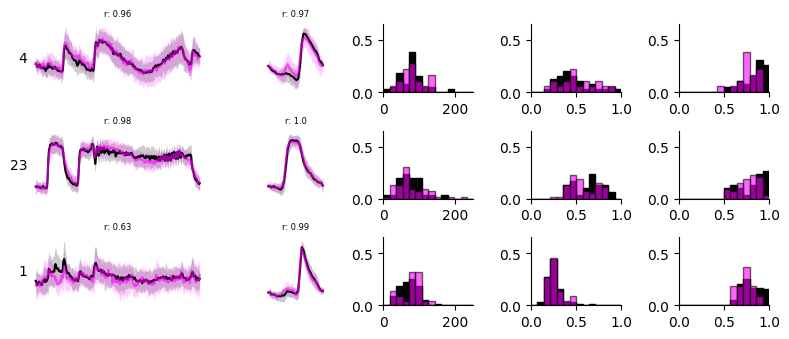

In [11]:
color_wt = 'k'
color_rd = 'magenta'
alpha_wt=.99
alpha_rd=0.6
ylim_max=0.65

fig,ax=plt.subplots(3,5,figsize=(8,3.5),gridspec_kw={'width_ratios': [3, 1, 1.5, 1.5, 1.5]})

i=3
# chirp
ax[0,0].plot(chirp_wt_p30_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[0,0].fill_between(np.arange(0,249,1),chirp_wt_p30_mean[i,:]+chirp_wt_p30_std[i,:],chirp_wt_p30_mean[i,:]-chirp_wt_p30_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[0,0].plot(chirp_rd_p30_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[0,0].fill_between(np.arange(0,249,1),chirp_rd_p30_mean[i,:]+chirp_rd_p30_std[i,:],chirp_rd_p30_mean[i,:]-chirp_rd_p30_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[0,0].axis('off')
ax[0,0].set_title('r: '+str(round(np.corrcoef(chirp_wt_p30_mean[i,:],chirp_rd_p30_mean[i,:])[0,1],2)),fontsize=6)

ax[0,1].plot(bar_wt_p30_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[0,1].fill_between(np.arange(0,32,1),bar_wt_p30_mean[i,:]+bar_wt_p30_std[i,:],bar_wt_p30_mean[i,:]-bar_wt_p30_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[0,1].plot(bar_rd_p30_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[0,1].fill_between(np.arange(0,32,1),bar_rd_p30_mean[i,:]+bar_rd_p30_std[i,:],bar_rd_p30_mean[i,:]-bar_rd_p30_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[0,1].axis('off')
ax[0,1].set_title('r: '+str(round(np.corrcoef(bar_wt_p30_mean[i,:],bar_rd_p30_mean[i,:])[0,1],2)),fontsize=6)

##############
# roi size
roi_size_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P30')]['roi_size_um2'].values
roi_size_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P30')]['roi_size_um2'].values
bins = np.linspace(0, 250, num=15) # lower and upper bounds
ax[0,2].hist(roi_size_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(roi_size_wt))/len(roi_size_wt),edgecolor='k')
ax[0,2].hist(roi_size_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(roi_size_rd))/len(roi_size_rd),edgecolor='k')
ax[0,2].set_xlim(0,250)
ax[0,2].set_ylim(0,ylim_max)

# QI Chirp
qi_chirp_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P30')]['gchirp_qidx'].values
qi_chirp_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P30')]['gchirp_qidx'].values
#_,bins = np.histogram(np.hstack((qi_chirp_wt,qi_chirp_rd)),bins=15)
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[0,3].hist(qi_chirp_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_chirp_wt))/len(qi_chirp_wt),edgecolor='k')
ax[0,3].hist(qi_chirp_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_chirp_rd))/len(qi_chirp_rd),edgecolor='k')
ax[0,3].set_xlim(0,1)
ax[0,3].set_ylim(0,ylim_max)

# QI Bar
qi_bar_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P30')]['bar_d_qi'].values
qi_bar_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P30')]['bar_d_qi'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[0,4].hist(qi_bar_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_bar_wt))/len(qi_bar_wt),edgecolor='k')
ax[0,4].hist(qi_bar_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_bar_rd))/len(qi_bar_rd),edgecolor='k')
ax[0,4].set_xlim(0,1)
ax[0,4].set_ylim(0,ylim_max)

ax[0,0].text(0, 0.5, f'{i+1}', transform=ax[0,0].transAxes, rotation=0, va='center', ha='right', fontsize=10)


# EXAMPLE 2

i=22
# chirp
ax[1,0].plot(chirp_wt_p30_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[1,0].fill_between(np.arange(0,249,1),chirp_wt_p30_mean[i,:]+chirp_wt_p30_std[i,:],chirp_wt_p30_mean[i,:]-chirp_wt_p30_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[1,0].plot(chirp_rd_p30_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[1,0].fill_between(np.arange(0,249,1),chirp_rd_p30_mean[i,:]+chirp_rd_p30_std[i,:],chirp_rd_p30_mean[i,:]-chirp_rd_p30_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[1,0].axis('off')
ax[1,0].set_title('r: '+str(round(np.corrcoef(chirp_wt_p30_mean[i,:],chirp_rd_p30_mean[i,:])[0,1],2)),fontsize=6)

ax[1,1].plot(bar_wt_p30_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[1,1].fill_between(np.arange(0,32,1),bar_wt_p30_mean[i,:]+bar_wt_p30_std[i,:],bar_wt_p30_mean[i,:]-bar_wt_p30_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[1,1].plot(bar_rd_p30_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[1,1].fill_between(np.arange(0,32,1),bar_rd_p30_mean[i,:]+bar_rd_p30_std[i,:],bar_rd_p30_mean[i,:]-bar_rd_p30_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[1,1].axis('off')
ax[1,1].set_title('r: '+str(round(np.corrcoef(bar_wt_p30_mean[i,:],bar_rd_p30_mean[i,:])[0,1],2)),fontsize=6)

# roi size
roi_size_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P30')]['roi_size_um2'].values
roi_size_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P30')]['roi_size_um2'].values
bins = np.linspace(0, 250, num=15) # lower and upper bounds
ax[1,2].hist(roi_size_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(roi_size_wt))/len(roi_size_wt),edgecolor='k')
ax[1,2].hist(roi_size_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(roi_size_rd))/len(roi_size_rd),edgecolor='k')
ax[1,2].set_xlim(0,250)
ax[1,2].set_ylim(0,ylim_max)

# QI Chirp
qi_chirp_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P30')]['gchirp_qidx'].values
qi_chirp_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P30')]['gchirp_qidx'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[1,3].hist(qi_chirp_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_chirp_wt))/len(qi_chirp_wt),edgecolor='k')
ax[1,3].hist(qi_chirp_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_chirp_rd))/len(qi_chirp_rd),edgecolor='k')
ax[1,3].set_xlim(0,1)
ax[1,3].set_ylim(0,ylim_max)

# QI Bar
qi_bar_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P30')]['bar_d_qi'].values
qi_bar_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P30')]['bar_d_qi'].values
#_,bins = np.histogram(np.hstack((qi_bar_wt,qi_bar_rd)),bins=15)
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[1,4].hist(qi_bar_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_bar_wt))/len(qi_bar_wt),edgecolor='k')
ax[1,4].hist(qi_bar_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_bar_rd))/len(qi_bar_rd),edgecolor='k')
ax[1,4].set_xlim(0,1)
ax[1,4].set_ylim(0,ylim_max)

ax[1,0].text(0, 0.5, f'{i+1}', transform=ax[1,0].transAxes, rotation=0, va='center', ha='right', fontsize=10)


# 3. example

i=0
# chirp
ax[2,0].plot(chirp_wt_p30_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[2,0].fill_between(np.arange(0,249,1),chirp_wt_p30_mean[i,:]+chirp_wt_p30_std[i,:],chirp_wt_p30_mean[i,:]-chirp_wt_p30_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[2,0].plot(chirp_rd_p30_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[2,0].fill_between(np.arange(0,249,1),chirp_rd_p30_mean[i,:]+chirp_rd_p30_std[i,:],chirp_rd_p30_mean[i,:]-chirp_rd_p30_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[2,0].axis('off')
ax[2,0].set_title('r: '+str(round(np.corrcoef(chirp_wt_p30_mean[i,:],chirp_rd_p30_mean[i,:])[0,1],2)),fontsize=6)

ax[2,1].plot(bar_wt_p30_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[2,1].fill_between(np.arange(0,32,1),bar_wt_p30_mean[i,:]+bar_wt_p30_std[i,:],bar_wt_p30_mean[i,:]-bar_wt_p30_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[2,1].plot(bar_rd_p30_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[2,1].fill_between(np.arange(0,32,1),bar_rd_p30_mean[i,:]+bar_rd_p30_std[i,:],bar_rd_p30_mean[i,:]-bar_rd_p30_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[2,1].axis('off')
ax[2,1].set_title('r: '+str(round(np.corrcoef(bar_wt_p30_mean[i,:],bar_rd_p30_mean[i,:])[0,1],2)),fontsize=6)

# roi size
roi_size_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P30')]['roi_size_um2'].values
roi_size_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P30')]['roi_size_um2'].values
bins = np.linspace(0, 250, num=15) # lower and upper bounds
ax[2,2].hist(roi_size_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(roi_size_wt))/len(roi_size_wt),edgecolor='k')
ax[2,2].hist(roi_size_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(roi_size_rd))/len(roi_size_rd),edgecolor='k')
ax[2,2].set_xlim(0,250)
ax[2,2].set_ylim(0,ylim_max)

# QI Chirp
qi_chirp_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P30')]['gchirp_qidx'].values
qi_chirp_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P30')]['gchirp_qidx'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[2,3].hist(qi_chirp_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_chirp_wt))/len(qi_chirp_wt),edgecolor='k')
ax[2,3].hist(qi_chirp_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_chirp_rd))/len(qi_chirp_rd),edgecolor='k')
ax[2,3].set_xlim(0,1)
ax[2,3].set_ylim(0,ylim_max)

# QI Bar
qi_bar_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P30')]['bar_d_qi'].values
qi_bar_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P30')]['bar_d_qi'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[2,4].hist(qi_bar_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_bar_wt))/len(qi_bar_wt),edgecolor='k')
ax[2,4].hist(qi_bar_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_bar_rd))/len(qi_bar_rd),edgecolor='k')
ax[2,4].set_xlim(0,1)
ax[2,4].set_ylim(0,ylim_max)

ax[2,0].text(0, 0.5, f'{i+1}', transform=ax[2,0].transAxes, rotation=0, va='center', ha='right', fontsize=10)


fig.tight_layout()
sns.despine()

In [12]:
i=3
print('WT - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P30')]['roi_size_um2'].values.shape[0]))
print('rd10 - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P30')]['roi_size_um2'].values.shape[0]))
print('-----------------------------')
i=22
print('WT - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P30')]['roi_size_um2'].values.shape[0]))
print('rd10 - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P30')]['roi_size_um2'].values.shape[0]))
print('-----------------------------')
i=0
print('WT - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P30')]['roi_size_um2'].values.shape[0]))
print('rd10 - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P30')]['roi_size_um2'].values.shape[0]))

WT - RGC type: 4; n=39
rd10 - RGC type: 4; n=18
-----------------------------
WT - RGC type: 23; n=30
rd10 - RGC type: 23; n=52
-----------------------------
WT - RGC type: 1; n=59
rd10 - RGC type: 1; n=22


## P45

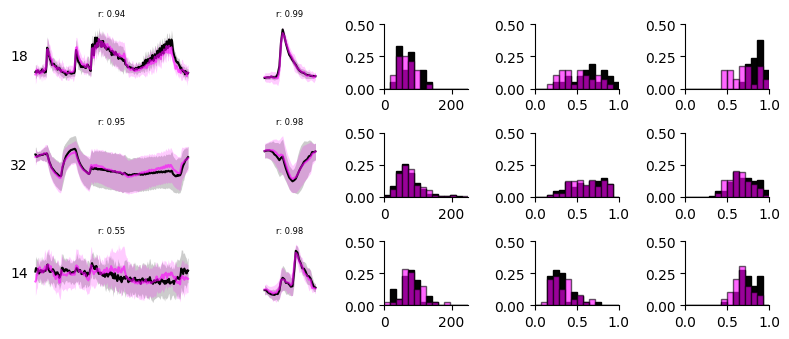

In [13]:
color_wt = 'k'
color_rd = 'magenta'
alpha_wt=.99
alpha_rd=0.6
ylim_max=0.5

fig,ax=plt.subplots(3,5,figsize=(8,3.5),gridspec_kw={'width_ratios': [3, 1, 1.5, 1.5, 1.5]})

i=17
# chirp
ax[0,0].plot(chirp_wt_p45_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[0,0].fill_between(np.arange(0,249,1),chirp_wt_p45_mean[i,:]+chirp_wt_p45_std[i,:],chirp_wt_p45_mean[i,:]-chirp_wt_p45_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[0,0].plot(chirp_rd_p45_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[0,0].fill_between(np.arange(0,249,1),chirp_rd_p45_mean[i,:]+chirp_rd_p45_std[i,:],chirp_rd_p45_mean[i,:]-chirp_rd_p45_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[0,0].axis('off')
ax[0,0].set_title('r: '+str(round(np.corrcoef(chirp_wt_p45_mean[i,:],chirp_rd_p45_mean[i,:])[0,1],2)),fontsize=6)

ax[0,1].plot(bar_wt_p45_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[0,1].fill_between(np.arange(0,32,1),bar_wt_p45_mean[i,:]+bar_wt_p45_std[i,:],bar_wt_p45_mean[i,:]-bar_wt_p45_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[0,1].plot(bar_rd_p45_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[0,1].fill_between(np.arange(0,32,1),bar_rd_p45_mean[i,:]+bar_rd_p45_std[i,:],bar_rd_p45_mean[i,:]-bar_rd_p45_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[0,1].axis('off')
ax[0,1].set_title('r: '+str(round(np.corrcoef(bar_wt_p45_mean[i,:],bar_rd_p45_mean[i,:])[0,1],2)),fontsize=6)

##############
# roi size
roi_size_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P45')]['roi_size_um2'].values
roi_size_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P45')]['roi_size_um2'].values
bins = np.linspace(0, 250, num=15) # lower and upper bounds
ax[0,2].hist(roi_size_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(roi_size_wt))/len(roi_size_wt),edgecolor='k')
ax[0,2].hist(roi_size_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(roi_size_rd))/len(roi_size_rd),edgecolor='k')
ax[0,2].set_xlim(0,250)
ax[0,2].set_ylim(0,ylim_max)

# QI Chirp
qi_chirp_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P45')]['gchirp_qidx'].values
qi_chirp_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P45')]['gchirp_qidx'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[0,3].hist(qi_chirp_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_chirp_wt))/len(qi_chirp_wt),edgecolor='k')
ax[0,3].hist(qi_chirp_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_chirp_rd))/len(qi_chirp_rd),edgecolor='k')
ax[0,3].set_xlim(0,1)
ax[0,3].set_ylim(0,ylim_max)

# QI Bar
qi_bar_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P45')]['bar_d_qi'].values
qi_bar_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P45')]['bar_d_qi'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[0,4].hist(qi_bar_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_bar_wt))/len(qi_bar_wt),edgecolor='k')
ax[0,4].hist(qi_bar_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_bar_rd))/len(qi_bar_rd),edgecolor='k')
ax[0,4].set_xlim(0,1)
ax[0,4].set_ylim(0,ylim_max)

ax[0,0].text(0, 0.5, f'{i+1}', transform=ax[0,0].transAxes, rotation=0, va='center', ha='right', fontsize=10)


# EXAMPLE 2

i=31
# chirp
ax[1,0].plot(chirp_wt_p45_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[1,0].fill_between(np.arange(0,249,1),chirp_wt_p45_mean[i,:]+chirp_wt_p45_std[i,:],chirp_wt_p45_mean[i,:]-chirp_wt_p45_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[1,0].plot(chirp_rd_p45_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[1,0].fill_between(np.arange(0,249,1),chirp_rd_p45_mean[i,:]+chirp_rd_p45_std[i,:],chirp_rd_p45_mean[i,:]-chirp_rd_p45_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[1,0].axis('off')
ax[1,0].set_title('r: '+str(round(np.corrcoef(chirp_wt_p45_mean[i,:],chirp_rd_p45_mean[i,:])[0,1],2)),fontsize=6)

ax[1,1].plot(bar_wt_p45_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[1,1].fill_between(np.arange(0,32,1),bar_wt_p45_mean[i,:]+bar_wt_p45_std[i,:],bar_wt_p45_mean[i,:]-bar_wt_p45_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[1,1].plot(bar_rd_p45_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[1,1].fill_between(np.arange(0,32,1),bar_rd_p45_mean[i,:]+bar_rd_p45_std[i,:],bar_rd_p45_mean[i,:]-bar_rd_p45_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[1,1].axis('off')
ax[1,1].set_title('r: '+str(round(np.corrcoef(bar_wt_p45_mean[i,:],bar_rd_p45_mean[i,:])[0,1],2)),fontsize=6)

# roi size
roi_size_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P45')]['roi_size_um2'].values
roi_size_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P45')]['roi_size_um2'].values
bins = np.linspace(0, 250, num=15) # lower and upper bounds
ax[1,2].hist(roi_size_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(roi_size_wt))/len(roi_size_wt),edgecolor='k')
ax[1,2].hist(roi_size_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(roi_size_rd))/len(roi_size_rd),edgecolor='k')
ax[1,2].set_xlim(0,250)
ax[1,2].set_ylim(0,ylim_max)

# QI Chirp
qi_chirp_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P45')]['gchirp_qidx'].values
qi_chirp_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P45')]['gchirp_qidx'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[1,3].hist(qi_chirp_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_chirp_wt))/len(qi_chirp_wt),edgecolor='k')
ax[1,3].hist(qi_chirp_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_chirp_rd))/len(qi_chirp_rd),edgecolor='k')
ax[1,3].set_xlim(0,1)
ax[1,3].set_ylim(0,ylim_max)

# QI Bar
qi_bar_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P45')]['bar_d_qi'].values
qi_bar_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P45')]['bar_d_qi'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[1,4].hist(qi_bar_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_bar_wt))/len(qi_bar_wt),edgecolor='k')
ax[1,4].hist(qi_bar_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_bar_rd))/len(qi_bar_rd),edgecolor='k')
ax[1,4].set_xlim(0,1)
ax[1,4].set_ylim(0,ylim_max)

ax[1,0].text(0, 0.5, f'{i+1}', transform=ax[1,0].transAxes, rotation=0, va='center', ha='right', fontsize=10)



# EXAMPLE 3

i=13
# chirp
ax[2,0].plot(chirp_wt_p45_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[2,0].fill_between(np.arange(0,249,1),chirp_wt_p45_mean[i,:]+chirp_wt_p45_std[i,:],chirp_wt_p45_mean[i,:]-chirp_wt_p45_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[2,0].plot(chirp_rd_p45_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[2,0].fill_between(np.arange(0,249,1),chirp_rd_p45_mean[i,:]+chirp_rd_p45_std[i,:],chirp_rd_p45_mean[i,:]-chirp_rd_p45_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[2,0].axis('off')
ax[2,0].set_title('r: '+str(round(np.corrcoef(chirp_wt_p45_mean[i,:],chirp_rd_p45_mean[i,:])[0,1],2)),fontsize=6)

ax[2,1].plot(bar_wt_p45_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[2,1].fill_between(np.arange(0,32,1),bar_wt_p45_mean[i,:]+bar_wt_p45_std[i,:],bar_wt_p45_mean[i,:]-bar_wt_p45_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[2,1].plot(bar_rd_p45_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[2,1].fill_between(np.arange(0,32,1),bar_rd_p45_mean[i,:]+bar_rd_p45_std[i,:],bar_rd_p45_mean[i,:]-bar_rd_p45_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[2,1].axis('off')
ax[2,1].set_title('r: '+str(round(np.corrcoef(bar_wt_p45_mean[i,:],bar_rd_p45_mean[i,:])[0,1],2)),fontsize=6)

# roi size
roi_size_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P45')]['roi_size_um2'].values
roi_size_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P45')]['roi_size_um2'].values
bins = np.linspace(0, 250, num=15) # lower and upper bounds
ax[2,2].hist(roi_size_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(roi_size_wt))/len(roi_size_wt),edgecolor='k')
ax[2,2].hist(roi_size_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(roi_size_rd))/len(roi_size_rd),edgecolor='k')
ax[2,2].set_xlim(0,250)
ax[2,2].set_ylim(0,ylim_max)

# QI Chirp
qi_chirp_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P45')]['gchirp_qidx'].values
qi_chirp_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P45')]['gchirp_qidx'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[2,3].hist(qi_chirp_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_chirp_wt))/len(qi_chirp_wt),edgecolor='k')
ax[2,3].hist(qi_chirp_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_chirp_rd))/len(qi_chirp_rd),edgecolor='k')
ax[2,3].set_xlim(0,1)
ax[2,3].set_ylim(0,ylim_max)

# QI Bar
qi_bar_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P45')]['bar_d_qi'].values
qi_bar_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P45')]['bar_d_qi'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[2,4].hist(qi_bar_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_bar_wt))/len(qi_bar_wt),edgecolor='k')
ax[2,4].hist(qi_bar_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_bar_rd))/len(qi_bar_rd),edgecolor='k')
ax[2,4].set_xlim(0,1)
ax[2,4].set_ylim(0,ylim_max)

ax[2,0].text(0, 0.5, f'{i+1}', transform=ax[2,0].transAxes, rotation=0, va='center', ha='right', fontsize=10)

fig.tight_layout()
sns.despine()

In [14]:
i=17
print('WT - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P45')]['roi_size_um2'].values.shape[0]))
print('rd10 - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P45')]['roi_size_um2'].values.shape[0]))
print('-----------------------------')
i=31
print('WT - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P45')]['roi_size_um2'].values.shape[0]))
print('rd10 - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P45')]['roi_size_um2'].values.shape[0]))
print('-----------------------------')
i=13
print('WT - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P45')]['roi_size_um2'].values.shape[0]))
print('rd10 - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P45')]['roi_size_um2'].values.shape[0]))

WT - RGC type: 18; n=21
rd10 - RGC type: 18; n=28
-----------------------------
WT - RGC type: 32; n=237
rd10 - RGC type: 32; n=440
-----------------------------
WT - RGC type: 14; n=40
rd10 - RGC type: 14; n=39


## P90

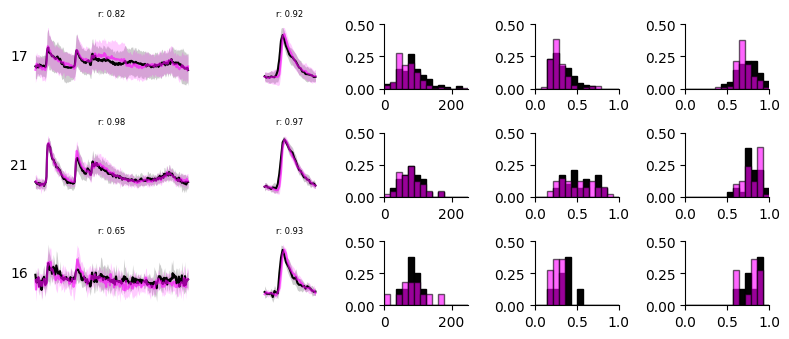

In [15]:
color_wt = 'k'
color_rd = 'magenta'
alpha_wt=.99
alpha_rd=0.6
ylim_max=0.5

fig,ax=plt.subplots(3,5,figsize=(8,3.5),gridspec_kw={'width_ratios': [3, 1, 1.5, 1.5, 1.5]})

i=16
# chirp
ax[0,0].plot(chirp_wt_p90_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[0,0].fill_between(np.arange(0,249,1),chirp_wt_p90_mean[i,:]+chirp_wt_p90_std[i,:],chirp_wt_p90_mean[i,:]-chirp_wt_p90_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[0,0].plot(chirp_rd_p90_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[0,0].fill_between(np.arange(0,249,1),chirp_rd_p90_mean[i,:]+chirp_rd_p90_std[i,:],chirp_rd_p90_mean[i,:]-chirp_rd_p90_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[0,0].axis('off')
ax[0,0].set_title('r: '+str(round(np.corrcoef(chirp_wt_p90_mean[i,:],chirp_rd_p90_mean[i,:])[0,1],2)),fontsize=6)

ax[0,1].plot(bar_wt_p90_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[0,1].fill_between(np.arange(0,32,1),bar_wt_p90_mean[i,:]+bar_wt_p90_std[i,:],bar_wt_p90_mean[i,:]-bar_wt_p90_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[0,1].plot(bar_rd_p90_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[0,1].fill_between(np.arange(0,32,1),bar_rd_p90_mean[i,:]+bar_rd_p90_std[i,:],bar_rd_p90_mean[i,:]-bar_rd_p90_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[0,1].axis('off')
ax[0,1].set_title('r: '+str(round(np.corrcoef(bar_wt_p90_mean[i,:],bar_rd_p90_mean[i,:])[0,1],2)),fontsize=6)

##############
# roi size
roi_size_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P90')]['roi_size_um2'].values
roi_size_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P45')]['roi_size_um2'].values
bins = np.linspace(0, 250, num=15) # lower and upper bounds
ax[0,2].hist(roi_size_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(roi_size_wt))/len(roi_size_wt),edgecolor='k')
ax[0,2].hist(roi_size_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(roi_size_rd))/len(roi_size_rd),edgecolor='k')
ax[0,2].set_xlim(0,250)
ax[0,2].set_ylim(0,ylim_max)

# QI Chirp
qi_chirp_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P90')]['gchirp_qidx'].values
qi_chirp_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P90')]['gchirp_qidx'].values
#_,bins = np.histogram(np.hstack((qi_chirp_wt,qi_chirp_rd)),bins=15)
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[0,3].hist(qi_chirp_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_chirp_wt))/len(qi_chirp_wt),edgecolor='k')
ax[0,3].hist(qi_chirp_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_chirp_rd))/len(qi_chirp_rd),edgecolor='k')
ax[0,3].set_xlim(0,1)
ax[0,3].set_ylim(0,ylim_max)

# QI Bar
qi_bar_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P90')]['bar_d_qi'].values
qi_bar_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P90')]['bar_d_qi'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[0,4].hist(qi_bar_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_bar_wt))/len(qi_bar_wt),edgecolor='k')
ax[0,4].hist(qi_bar_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_bar_rd))/len(qi_bar_rd),edgecolor='k')
ax[0,4].set_xlim(0,1)
ax[0,4].set_ylim(0,ylim_max)

ax[0,0].text(0, 0.5, f'{i+1}', transform=ax[0,0].transAxes, rotation=0, va='center', ha='right', fontsize=10)


# EXAMPLE 2

i=20
# chirp
ax[1,0].plot(chirp_wt_p90_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[1,0].fill_between(np.arange(0,249,1),chirp_wt_p90_mean[i,:]+chirp_wt_p90_std[i,:],chirp_wt_p90_mean[i,:]-chirp_wt_p90_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[1,0].plot(chirp_rd_p90_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[1,0].fill_between(np.arange(0,249,1),chirp_rd_p90_mean[i,:]+chirp_rd_p90_std[i,:],chirp_rd_p90_mean[i,:]-chirp_rd_p90_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[1,0].axis('off')
ax[1,0].set_title('r: '+str(round(np.corrcoef(chirp_wt_p90_mean[i,:],chirp_rd_p90_mean[i,:])[0,1],2)),fontsize=6)

ax[1,1].plot(bar_wt_p90_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[1,1].fill_between(np.arange(0,32,1),bar_wt_p90_mean[i,:]+bar_wt_p90_std[i,:],bar_wt_p90_mean[i,:]-bar_wt_p90_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[1,1].plot(bar_rd_p90_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[1,1].fill_between(np.arange(0,32,1),bar_rd_p90_mean[i,:]+bar_rd_p90_std[i,:],bar_rd_p90_mean[i,:]-bar_rd_p90_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[1,1].axis('off')
ax[1,1].set_title('r: '+str(round(np.corrcoef(bar_wt_p90_mean[i,:],bar_rd_p90_mean[i,:])[0,1],2)),fontsize=6)

# roi size
roi_size_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P90')]['roi_size_um2'].values
roi_size_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P90')]['roi_size_um2'].values
bins = np.linspace(0, 250, num=15) # lower and upper bounds
ax[1,2].hist(roi_size_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(roi_size_wt))/len(roi_size_wt),edgecolor='k')
ax[1,2].hist(roi_size_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(roi_size_rd))/len(roi_size_rd),edgecolor='k')
ax[1,2].set_xlim(0,250)
ax[1,2].set_ylim(0,ylim_max)

# QI Chirp
qi_chirp_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P90')]['gchirp_qidx'].values
qi_chirp_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P90')]['gchirp_qidx'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[1,3].hist(qi_chirp_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_chirp_wt))/len(qi_chirp_wt),edgecolor='k')
ax[1,3].hist(qi_chirp_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_chirp_rd))/len(qi_chirp_rd),edgecolor='k')
ax[1,3].set_xlim(0,1)
ax[1,3].set_ylim(0,ylim_max)

# QI Bar
qi_bar_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P90')]['bar_d_qi'].values
qi_bar_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P90')]['bar_d_qi'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[1,4].hist(qi_bar_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_bar_wt))/len(qi_bar_wt),edgecolor='k')
ax[1,4].hist(qi_bar_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_bar_rd))/len(qi_bar_rd),edgecolor='k')
ax[1,4].set_xlim(0,1)
ax[1,4].set_ylim(0,ylim_max)

ax[1,0].text(0, 0.5, f'{i+1}', transform=ax[1,0].transAxes, rotation=0, va='center', ha='right', fontsize=10)


# EXAMPLE 3
i=15
# chirp
ax[2,0].plot(chirp_wt_p90_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[2,0].fill_between(np.arange(0,249,1),chirp_wt_p90_mean[i,:]+chirp_wt_p90_std[i,:],chirp_wt_p90_mean[i,:]-chirp_wt_p90_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[2,0].plot(chirp_rd_p90_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[2,0].fill_between(np.arange(0,249,1),chirp_rd_p90_mean[i,:]+chirp_rd_p90_std[i,:],chirp_rd_p90_mean[i,:]-chirp_rd_p90_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[2,0].axis('off')
ax[2,0].set_title('r: '+str(round(np.corrcoef(chirp_wt_p90_mean[i,:],chirp_rd_p90_mean[i,:])[0,1],2)),fontsize=6)

ax[2,1].plot(bar_wt_p90_mean[i,:],color=color_wt,alpha=alpha_wt)
ax[2,1].fill_between(np.arange(0,32,1),bar_wt_p90_mean[i,:]+bar_wt_p90_std[i,:],bar_wt_p90_mean[i,:]-bar_wt_p90_std[i,:],alpha=0.2,color=color_wt,edgecolor="b", linewidth=0.0)
ax[2,1].plot(bar_rd_p90_mean[i,:],color=color_rd,alpha=alpha_rd)
ax[2,1].fill_between(np.arange(0,32,1),bar_rd_p90_mean[i,:]+bar_rd_p90_std[i,:],bar_rd_p90_mean[i,:]-bar_rd_p90_std[i,:],alpha=0.2,color=color_rd,edgecolor="b", linewidth=0.0)
ax[2,1].axis('off')
ax[2,1].set_title('r: '+str(round(np.corrcoef(bar_wt_p90_mean[i,:],bar_rd_p90_mean[i,:])[0,1],2)),fontsize=6)

# roi size
roi_size_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P90')]['roi_size_um2'].values
roi_size_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P90')]['roi_size_um2'].values
bins = np.linspace(0, 250, num=15) # lower and upper bounds
ax[2,2].hist(roi_size_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(roi_size_wt))/len(roi_size_wt),edgecolor='k')
ax[2,2].hist(roi_size_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(roi_size_rd))/len(roi_size_rd),edgecolor='k')
ax[2,2].set_xlim(0,250)
ax[2,2].set_ylim(0,ylim_max)

# QI Chirp
qi_chirp_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P90')]['gchirp_qidx'].values
qi_chirp_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P90')]['gchirp_qidx'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[2,3].hist(qi_chirp_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_chirp_wt))/len(qi_chirp_wt),edgecolor='k')
ax[2,3].hist(qi_chirp_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_chirp_rd))/len(qi_chirp_rd),edgecolor='k')
ax[2,3].set_xlim(0,1)
ax[2,3].set_ylim(0,ylim_max)

# QI Bar
qi_bar_wt = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P90')]['bar_d_qi'].values
qi_bar_rd = rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P90')]['bar_d_qi'].values
bins = np.linspace(0, 1, num=15) # lower and upper bounds
ax[2,4].hist(qi_bar_wt,bins=bins,alpha=alpha_wt,color='k',density=False,weights=np.ones(len(qi_bar_wt))/len(qi_bar_wt),edgecolor='k')
ax[2,4].hist(qi_bar_rd,bins=bins,alpha=alpha_rd,color='magenta',density=False,weights=np.ones(len(qi_bar_rd))/len(qi_bar_rd),edgecolor='k')
ax[2,4].set_xlim(0,1)
ax[2,4].set_ylim(0,ylim_max)

ax[2,0].text(0, 0.5, f'{i+1}', transform=ax[2,0].transAxes, rotation=0, va='center', ha='right', fontsize=10)

fig.tight_layout()
sns.despine()

In [16]:
i=16
print('WT - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P90')]['roi_size_um2'].values.shape[0]))
print('rd10 - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P90')]['roi_size_um2'].values.shape[0]))
print('-----------------------------')
i=20
print('WT - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P90')]['roi_size_um2'].values.shape[0]))
print('rd10 - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P90')]['roi_size_um2'].values.shape[0]))
print('-----------------------------')
i=15
print('WT - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='Bl6')&(rd10_df['animrem']=='P90')]['roi_size_um2'].values.shape[0]))
print('rd10 - RGC type: '+str(i+1)+'; n='+str(rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['genline']=='rd10')&(rd10_df['animrem']=='P90')]['roi_size_um2'].values.shape[0]))

WT - RGC type: 17; n=128
rd10 - RGC type: 17; n=103
-----------------------------
WT - RGC type: 21; n=29
rd10 - RGC type: 21; n=41
-----------------------------
WT - RGC type: 16; n=8
rd10 - RGC type: 16; n=11
